In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Created on Sat Nov 30 11:58:04 2019
@author: farshadtoosi
"""

import io
import os

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
import itertools
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import linear_model, preprocessing, svm
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, mean_squared_error)
from sklearn.model_selection import (StratifiedKFold, cross_val_score,
                                     train_test_split)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
from ttictoc import TicToc


In [2]:
THIS_FOLDER = os.path.dirname(os.path.abspath(__file__))
file = os.path.join(THIS_FOLDER, "data", "bank.csv")
style.use("ggplot")

NameError: name '__file__' is not defined

In [4]:
# Utils
def print_table(dataframe):
    print(tabulate(dataframe, headers = "keys", tablefmt = "psql"))

def data_transform(dataframe):
    labelEnc = preprocessing.LabelEncoder()
    labels = dataframe.columns.values

    # Data clean-up
    # Need integers to do maths
    if("job" in labels):
        labelEnc.fit(["admin.", "blue-collar", "entrepreneur", "housemaid", "management",
            "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown"])
        dataframe["job"] = labelEnc.transform(dataframe["job"]).astype("int")
    if("marital" in labels):
        labelEnc.fit(["divorced", "married", "single", "unknown"])
        dataframe["marital"] = labelEnc.transform(dataframe["marital"]).astype("int")
    if("education" in labels):
        labelEnc.fit(["basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown", "tertiary", "primary", "secondary"])
        dataframe["education"] = labelEnc.transform(dataframe["education"]).astype("int")
    if("housing_loan" in labels):
        labelEnc.fit(["no", "yes", "unknown"])
        dataframe["housing_loan"] = labelEnc.transform(dataframe["housing_loan"]).astype("int")
    if("personal_loan" in labels):
        labelEnc.fit(["no", "yes", "unknown"])
        dataframe["personal_loan"] = labelEnc.transform(dataframe["personal_loan"]).astype("int")
    if("poutcome" in labels):
        labelEnc.fit(["other", "unknown", "failure", "nonexistent", "success"])
        dataframe["poutcome"] = labelEnc.transform(dataframe["poutcome"]).astype("int")
    if("y" in labels):
        labelEnc.fit(["other", "yes", "no"])
        dataframe["y"] = labelEnc.transform(dataframe["y"]).astype("int")
    if("loan" in labels):
        labelEnc.fit(["yes", "no"])
        dataframe["loan"] = labelEnc.transform(dataframe["loan"]).astype("int")
    if("default" in labels):
        labelEnc.fit(["yes", "no"])
        dataframe["default"] = labelEnc.transform(dataframe["default"]).astype("int")
    return dataframe

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel("True label")
    plt.xlabel("Predicted label")

def evaluate_result(array, anotherArray):
    match = 0
    fail = 0
    try:
        for index, result in enumerate(anotherArray):
            if(array[index] == anotherArray[index]):
                match = match + 1
            else:
                fail = fail + 1
    except Exception as exc:
    # Sometimes we have non-arrays
        try:
            print(np.array(array).any(anotherArray))
        except: 
            pass

    total = match + fail
    if(total == 0):
        print("ERR: The array which was supposed to be evaluated had non-sensical content.")
        total = 1   # Something went wrong and we don't want devision by zero
    accuracy = (match / total) * 100 
    return accuracy

def seconds_to_minutes(seconds):
    return seconds / 60


In [ ]:
# TASK 1

file_path = "bank.csv"

data = pd.read_csv(
        file_path,
        usecols = (
            0,  # age
            1,  # job
            15, # p outcome
            4,  # balance
            5,  # default
            18, # y - classifier
            7,  # loan - classifier
        )
    )
timer = TicToc()

# Data clean-up
data = data_transform(data)
print_table(data.head())

X_data = (data.drop("y", 1))
Y_data = (data["y"])
A_data = (data.drop("loan", 1))
B_data = (data["loan"])

# Training/testing sets 
X_train = X_data[:-250] 
X_test = X_data[-250:] 
Y_train = Y_data[:-250] 
Y_test = Y_data[-250:] 

A_train = A_data[:-250] 
A_test = A_data[-250:] 
B_train = B_data[:-250] 
B_test = B_data[-250:] 

# Apply linear regression model 
# regr = linear_model.LinearRegression() 
timer.tic()
regr = svm.SVC(gamma = 0.5, C=100) 
regr.fit(X_train, Y_train) 
prediction_x = regr.predict(X_test)
timer.toc()
print(f"Y-classified: {evaluate_result(prediction_x, Y_test.values)}% matched in {timer.elapsed}s")

timer.tic()
svc = svm.SVC(gamma = 0.5, C=100) 
svc.fit(A_train, B_train) 
prediction_a = svc.predict(A_test)
timer.toc()
print(f"Loan-classified: {evaluate_result(prediction_a, B_test.values)}% matched in {timer.elapsed}s")

plt.show()
    

+----+-------+-----------+
|    |   age |   marital |
|----+-------+-----------|
|  0 |    58 |         1 |
|  1 |    44 |         2 |
|  2 |    33 |         1 |
|  3 |    47 |         1 |
|  4 |    33 |         2 |
+----+-------+-----------+
INFO: Rendering 45211 data points - 
INFO: This may take a while...
INFO: Completed 1000 iterations
INFO: Completed 2000 iterations
INFO: Completed 3000 iterations
INFO: Completed 4000 iterations
INFO: Completed 5000 iterations
INFO: Completed 6000 iterations
INFO: Completed 7000 iterations
INFO: Completed 8000 iterations
INFO: Completed 9000 iterations
INFO: Completed 10000 iterations
INFO: Completed 11000 iterations
INFO: Completed 12000 iterations
INFO: Completed 13000 iterations
INFO: Completed 14000 iterations
INFO: Completed 15000 iterations
INFO: Completed 16000 iterations
INFO: Completed 17000 iterations
INFO: Completed 18000 iterations
INFO: Completed 19000 iterations
INFO: Completed 20000 iterations
INFO: Completed 21000 iterations
INFO:

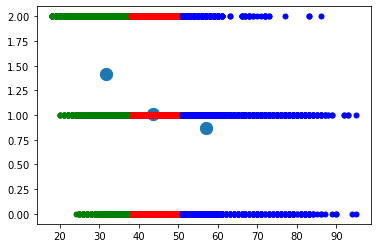

In [5]:
# TASK 2

data = pd.read_csv(
    "bank.csv",
    usecols = (
        0,  # age
        2,  # martial
    )
)
labels = data.columns.values
colors = ["r.", "g.", "b."]
timer = TicToc()

# Data clean-up
data = data_transform(data)
print_table(data.head())

classifier = KMeans(n_clusters=3)
classifier.fit(data)
center = classifier.cluster_centers_
kmeans_labels = classifier.labels_

timer.tic()
print(f"INFO: Rendering {len(data)} data points - ")
print("INFO: This may take a while...")
for index in range(len(data)):
    if(0 < index and index % 1000 == 0):
        print(f"INFO: Completed {index} iterations")
    plt.plot(
        data[labels[0]][index], 
        data[labels[1]][index],
        colors[kmeans_labels[index]],
        markersize = 10,
    )
timer.toc()
print(f"Render time for all data points: {timer.elapsed}s ({seconds_to_minutes(timer.elapsed)}min)")

plt.scatter(
    center[:,0], 
    center[:,1], 
    marker="o",
    s = 150,
)
plt.show()


In [7]:
# TASK 3

binning3 = preprocessing.KBinsDiscretizer(n_bins = 3)
binning6 = preprocessing.KBinsDiscretizer(n_bins = 6)
binning9 = preprocessing.KBinsDiscretizer(n_bins = 9)

data = pd.read_csv(
        "bank.csv",
        usecols = (
            7,  # loan - classifier
            16, # bank_arg1
            18, # y - classifier
        )
    )
labels = data.columns.values
timer = TicToc()

# Data clean-up
data = data_transform(data)

print_table(data.head())

X_data = (data.drop("bank_arg1", 1))
Y_data = (data["bank_arg1"])

# Training/testing sets 
X_train = X_data[:-2500] 
X_test = X_data[-2500:] 
Y_train = Y_data[:-2500] 
Y_test = Y_data[-2500:] 

timer.tic()
binning3.fit(X_data)
prediction3 = binning3.transform(X_data)
timer.toc()

timer.tic()
binning6.fit(X_data)
prediction6 = binning6.transform(X_data)
timer.toc()

timer.tic()
binning9.fit(X_data)
prediction9 = binning9.transform(X_data)    
timer.toc()

# TODO: Fix evaluation for matrix
acc3 = evaluate_result(prediction3, Y_data.values)
acc6 = evaluate_result(prediction6, Y_data.values)
acc9 = evaluate_result(prediction9, Y_data.values)

print(f"Binning with 3 units: {acc3}% matched in {timer.elapsed}s")
print(f"Binning with 6 units: {acc6}% matched in {timer.elapsed}s")
print(f"Binning with 9 units: {acc9}% matched in {timer.elapsed}s")



+----+--------+-------------+-----+
|    |   loan |   bank_arg1 |   y |
|----+--------+-------------+-----|
|  0 |      0 |        0.15 |   0 |
|  1 |      0 |        0.17 |   0 |
|  2 |      1 |        0.38 |   0 |
|  3 |      0 |        0.15 |   0 |
|  4 |      0 |        0.17 |   0 |
+----+--------+-------------+-----+
ERR: The array which was supposed to be evaluated had non-sensical content.
ERR: The array which was supposed to be evaluated had non-sensical content.
ERR: The array which was supposed to be evaluated had non-sensical content.
Binning with 3 units: 0.0% matched in 0.009997844696044922s
Binning with 6 units: 0.0% matched in 0.009997844696044922s
Binning with 9 units: 0.0% matched in 0.009997844696044922s


C:\Users\yojak\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\yojak\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\yojak\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\yojak\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 

In [9]:
# TASK 4

data = pd.read_csv(
    "bank.csv",
    usecols = (
        0,  # age
        1,  # job
        2,  # martial
        3,  # education
        7,  # loan
        18, # y - classifier
    )
)
labels = data.columns.values
timer = TicToc()

# Data clean-up
data = data_transform(data)

print_table(data.head())

X_data = (data.drop("y", 1))
Y_data = (data["y"])

# Training/testing sets 
X_train = X_data[:-10000] 
X_test = X_data[-10000:] 
Y_train = Y_data[:-10000] 
Y_test = Y_data[-10000:] 

kneighbors = KNeighborsClassifier()
dec_tree = DecisionTreeClassifier()
gauss = GaussianNB()
svc = svm.SVC()
random_forest = RandomForestClassifier()

timer.tic()
kneighbors.fit(X_train, Y_train)
prediction_kn = kneighbors.predict(X_test)    
timer.toc()
print(f"KNeighborsClassifier: {evaluate_result(prediction_kn, Y_test.values)}% matched in {timer.elapsed}s")

timer.tic()
dec_tree.fit(X_train, Y_train)
prediction_dec = dec_tree.predict(X_test)    
timer.toc()
print(f"DecisionTreeClassifier: {evaluate_result(prediction_dec, Y_test.values)}% matched in {timer.elapsed}s")

timer.tic()
gauss.fit(X_train, Y_train)
prediction_g = gauss.predict(X_test)    
timer.toc()
print(f"GaussianNB: {evaluate_result(prediction_g, Y_test.values)}% matched in {timer.elapsed}s")

timer.tic()
svc.fit(X_train, Y_train)
prediction_svc = svc.predict(X_test)    
timer.toc()
print(f"svm.SVC: {evaluate_result(prediction_svc, Y_test.values)}% matched in {timer.elapsed}s")

timer.tic()
random_forest.fit(X_train, Y_train)
prediction_for = random_forest.predict(X_test)    
timer.toc()
print(f"RandomForestClassifier: {evaluate_result(prediction_for, Y_test.values)}% matched in {timer.elapsed}s")



+----+-------+-------+-----------+-------------+--------+-----+
|    |   age |   job |   marital |   education |   loan |   y |
|----+-------+-------+-----------+-------------+--------+-----|
|  0 |    58 |     4 |         1 |           8 |      0 |   0 |
|  1 |    44 |     9 |         2 |           7 |      0 |   0 |
|  2 |    33 |     2 |         1 |           7 |      1 |   0 |
|  3 |    47 |     1 |         1 |          10 |      0 |   0 |
|  4 |    33 |    11 |         2 |          10 |      0 |   0 |
+----+-------+-------+-----------+-------------+--------+-----+
KNeighborsClassifier: 70.05% matched in 0.6953673362731934s
DecisionTreeClassifier: 70.11% matched in 0.04398941993713379s
GaussianNB: 70.86% matched in 0.011997461318969727s
svm.SVC: 70.87% matched in 8.24979853630066s
RandomForestClassifier: 70.03% matched in 1.9900727272033691s


+----+-------------+-------------+
|    |   bank_arg1 |   bank_arg2 |
|----+-------------+-------------|
|  0 |        0.15 |        0.18 |
|  1 |        0.17 |        0.13 |
|  2 |        0.38 |        0.2  |
|  3 |        0.15 |        0.13 |
|  4 |        0.17 |        0.12 |
+----+-------------+-------------+
INFO: Rendering 45211 data points - 
INFO: This may take a while...
Render time for all data points: 0.7618348598480225s (0.012697247664133708min)


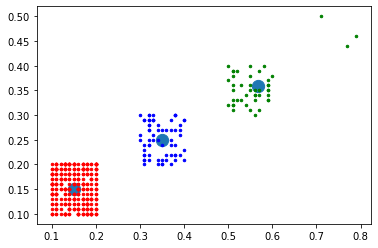

In [16]:
# TASK 5

data = pd.read_csv(
    "bank.csv",
    usecols = (
        16, # bank_arg1
        17, # bank_arg2
    )
)
labels = data.columns.values
timer = TicToc()
colors = ["r.", "g.", "b."]

print_table(data.head())

classifier = KMeans(n_clusters=3)
classifier.fit(data)
center = classifier.cluster_centers_
kmeans_labels = classifier.labels_

timer.tic()
print(f"INFO: Rendering {len(data)} data points - ")
print("INFO: This may take a while...")
for index in range(len(data)):
    if(0 < index and index % 100 == 0):
        # print(f"INFO: Completed {index} iterations")
        plt.plot(
            data[labels[0]][index], 
            data[labels[1]][index],
            colors[kmeans_labels[index]],
            markersize = 5,
        )
timer.toc()
print(f"Render time for all data points: {timer.elapsed}s ({seconds_to_minutes(timer.elapsed)}min)")

plt.scatter(
    center[:,0], 
    center[:,1], 
    marker="o",
    s = 150,
)
plt.show()



In [20]:
# TASK 6

data = pd.read_csv(
    "bank.csv",
    usecols = (
        0,  # age
        1,  # job
        2,  # martial
        3,  # education
        7,  # loan
        18, # y - classifier
    )
)
labels = data.columns.values
timer = TicToc()

# Data clean-up
data = data_transform(data)

print_table(data.head())

X_data = (data.drop("y", 1))
Y_data = (data["y"])

# Training/testing sets 
X_train = X_data[:-10000] 
X_test = X_data[-10000:] 
Y_train = Y_data[:-10000] 
Y_test = Y_data[-10000:] 

A_train = X_data[:-10] 
A_test = X_data[-10:] 
B_train = Y_data[:-10] 
B_test = Y_data[-10:] 

dec_tree = DecisionTreeClassifier()
dec_tree_underfit = DecisionTreeClassifier()

timer.tic()
dec_tree.fit(X_train, Y_train)
prediction_dec = dec_tree.predict(X_test)    
timer.toc()
print(f"DecisionTreeClassifier: {evaluate_result(prediction_dec, Y_test.values)}% matched in {timer.elapsed}s")
print(f"{accuracy_score(Y_test, prediction_dec)}")

timer.tic()
dec_tree_underfit.fit(A_train, B_train)
prediction_underfit = dec_tree.predict(A_test)    
timer.toc()
print(f"DecisionTreeClassifier-Underfit: {evaluate_result(prediction_underfit, B_test.values)}% matched in {timer.elapsed}s")
print(f"{accuracy_score(B_test, prediction_underfit)}")

# TODO: Explain over-fitting a data set



+----+-------+-------+-----------+-------------+--------+-----+
|    |   age |   job |   marital |   education |   loan |   y |
|----+-------+-------+-----------+-------------+--------+-----|
|  0 |    58 |     4 |         1 |           8 |      0 |   0 |
|  1 |    44 |     9 |         2 |           7 |      0 |   0 |
|  2 |    33 |     2 |         1 |           7 |      1 |   0 |
|  3 |    47 |     1 |         1 |          10 |      0 |   0 |
|  4 |    33 |    11 |         2 |          10 |      0 |   0 |
+----+-------+-------+-----------+-------------+--------+-----+
DecisionTreeClassifier: 70.1% matched in 0.0439906120300293s
0.701
DecisionTreeClassifier-Underfit: 20.0% matched in 0.05198836326599121s
0.2


In [21]:
# TASK 7

data = pd.read_csv(
    "bank.csv",
    usecols = (
        5,  # balance
        7,  # loan
        16, # bank_arg1
        18, # y - classifier
    )
)
labels = data.columns.values
timer = TicToc()

# Data clean-up
data = data_transform(data)
print_table(data.head())

X_data = (data.drop("y", 1))
Y_data = (data["y"])

X_train = X_data[:-1] 
X_test = X_data[-1:] 
Y_train = Y_data[:-1] 
Y_test = Y_data[-1:]

dec_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

timer.tic()
dec_tree.fit(X_train, Y_train)
prediction_dec = dec_tree.predict(X_test)    
timer.toc()
print(f"DecisionTreeClassifier: {evaluate_result(prediction_dec, Y_test.values)}% matched in {timer.elapsed}s")

timer.tic()
random_forest.fit(X_train, Y_train)
prediction_for = random_forest.predict(X_test)    
timer.toc()
print(f"RandomForestClassifier: {evaluate_result(prediction_for, Y_test.values)}% matched in {timer.elapsed}s")


+----+-----------+--------+-------------+-----+
|    |   balance |   loan |   bank_arg1 |   y |
|----+-----------+--------+-------------+-----|
|  0 |      2143 |      0 |        0.15 |   0 |
|  1 |        29 |      0 |        0.17 |   0 |
|  2 |         2 |      1 |        0.38 |   0 |
|  3 |      1506 |      0 |        0.15 |   0 |
|  4 |         1 |      0 |        0.17 |   0 |
+----+-----------+--------+-------------+-----+
DecisionTreeClassifier: 100.0% matched in 0.013996601104736328s
RandomForestClassifier: 100.0% matched in 1.0987613201141357s
